In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import PIL
import IPython.display
import PIL.Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
imgs_path = []
img_labels = []
imgs = []
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        imgs_path.append(os.path.join(dirname, filename))
        imgs.append(tf.keras.utils.load_img(os.path.join(dirname, filename)))
        label = dirname
        index = label.rfind("\\")
        while '\\' in label:
            label = label[index + 1:]
        img_labels.append(label)

Apple Crimson Snow


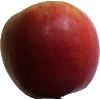

In [4]:
index = 23180
#print(len(imgs_path))
print(img_labels[index])
IPython.display.display(imgs[index])

In [5]:
pd_labels = pd.DataFrame(img_labels)
#target_indexes = pd_labels[pd_labels[0].str.contains('Apple Braeburn')].index
labels_cat = pd.Categorical(pd_labels[0])
print(labels_cat)
print(labels_cat.codes)
imgs_norm = np.array(imgs).astype('float32') / 255  #[0,255]->[0,1]

x = imgs_norm
y = labels_cat.codes
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ..., 'Watermelon', 'Watermelon', 'Watermelon', 'Watermelon', 'Watermelon']
Length: 90380
Categories (131, object): ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', ..., 'Tomato Yellow', 'Tomato not Ripened', 'Walnut', 'Watermelon']
[  0   0   0 ... 130 130 130]


In [6]:
print(np.unique(y_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130]


In [7]:
tf.random.set_seed(1)
np.random.seed(1)

IMG_SIZE = (100, 100)
NUM_CLASSES = 131
EPOCHS = 5
model = keras.applications.InceptionV3(include_top=False, input_shape=IMG_SIZE + (3,))
for layer in model.layers:
    layer.trainable = False

x = keras.layers.GlobalAveragePooling2D()(model.output)
x = keras.layers.Dense(100, activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(),
                       kernel_regularizer=tf.keras.regularizers.l2(0.001),
                      )(x)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(100, activation='relu',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001),
                      )(x)
#x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = keras.models.Model(inputs=model.input, outputs=output)

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',    
    metrics = ['accuracy']
)
#print(model.summary())

In [9]:
with tf.device('/cpu:0'):
    x_train_tensor = tf.convert_to_tensor(x_train, np.float32)
    y_train_tensor = tf.convert_to_tensor(y_train, np.float32)
    x_val_tensor = tf.convert_to_tensor(x_val, np.float32)
    y_val_tensor = tf.convert_to_tensor(y_val, np.float32)
    x_test_tensor = tf.convert_to_tensor(x_test, np.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, np.float32)

In [10]:
init_weights = model.get_weights()
history = model.fit(
    x_train_tensor,
    y_train_tensor,
    epochs = 20,
    batch_size = 128,
    validation_data = (x_val_tensor, y_val_tensor)
)

Epoch 1/20
452/452 [==============================] - 113s 141ms/step - loss: 1.1361 - accuracy: 0.7914 - val_loss: 0.4052 - val_accuracy: 0.9544
Epoch 2/20
452/452 [==============================] - 63s 139ms/step - loss: 0.3329 - accuracy: 0.9727 - val_loss: 0.2904 - val_accuracy: 0.9806
Epoch 3/20
452/452 [==============================] - 63s 139ms/step - loss: 0.2660 - accuracy: 0.9849 - val_loss: 0.2606 - val_accuracy: 0.9830
Epoch 4/20
452/452 [==============================] - 63s 139ms/step - loss: 0.2381 - accuracy: 0.9881 - val_loss: 0.2392 - val_accuracy: 0.9837
Epoch 5/20
452/452 [==============================] - 63s 139ms/step - loss: 0.2236 - accuracy: 0.9877 - val_loss: 0.2472 - val_accuracy: 0.9770
Epoch 6/20
452/452 [==============================] - 63s 139ms/step - loss: 0.2066 - accuracy: 0.9899 - val_loss: 0.2282 - val_accuracy: 0.9812
Epoch 7/20
452/452 [==============================] - 63s 139ms/step - loss: 0.2106 - accuracy: 0.9861 - val_loss: 0.2383 - val_a

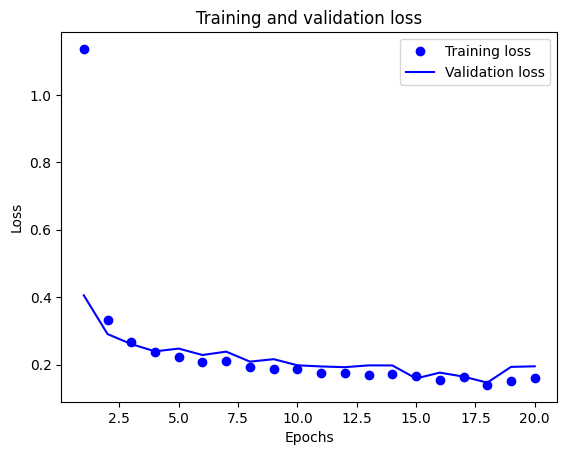

565/565 [==============================] - 68s 119ms/step - loss: 0.1927 - accuracy: 0.9757


[0.19272655248641968, 0.9757136702537537]

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

results = model.evaluate(x_test_tensor, y_test_tensor)
results

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [16]:
predictions = model.predict(x_test_tensor)

565/565 [==============================] - 55s 87ms/step


In [18]:
pred_array = np.array([])
for i in range(len(predictions)):
    #print(f"loop: {i}, value: {np.unravel_index(np.argmax(predictions[i]), predictions[i].shape)}")
    pred_array = np.append(pred_array, np.unravel_index(np.argmax(predictions[i]), predictions[i].shape))

print(pred_array)

[ 63.  40. 119. ...  57. 130. 114.]


In [19]:
print("F1 Score: ", f1_score(y_test, pred_array, average='weighted'))
print("Classification Report: \n", classification_report(y_test, pred_array))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred_array))
print("Accuracy Score: ", accuracy_score(y_test, pred_array))

F1 Score:  0.9757936827378259
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       125
           1       1.00      0.93      0.96       127
           2       0.90      1.00      0.95       135
           3       0.98      0.85      0.91       141
           4       0.66      0.99      0.80       141
           5       1.00      0.66      0.80       134
           6       0.98      0.98      0.98       120
           7       0.98      0.98      0.98       138
           8       1.00      0.89      0.94       126
           9       0.83      1.00      0.91       116
          10       1.00      0.96      0.98       159
          11       1.00      0.99      1.00       132
          12       0.96      1.00      0.98       173
          13       0.96      1.00      0.98       129
          14       0.99      0.98      0.99       119
          15       0.99      1.00      1.00       130
          16       1.00   